In [2]:
from pyspark.sql import SQLContext, SparkSession
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
import matplotlib.pyplot as plt
from pyspark.ml.clustering import KMeans, BisectingKMeans
from kneed import KneeLocator
from pyspark.ml.evaluation import ClusteringEvaluator

In [3]:
spark = SparkSession.Builder().appName('DDAM_Project_Mushrooms').getOrCreate()
sql_ctx = SQLContext(spark)
mushroom_df_cleaned = spark.read.options(inferSchema = True, delimiter = ',', header = True).csv('dataset/cleaned.csv')

24/06/04 10:51:25 WARN Utils: Your hostname, Francescos-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.5 instead (on interface en0)
24/06/04 10:51:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/04 10:51:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/06/04 10:51:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/Users/effepielle/Developer/university/unipi/ddam/ddam-2324/.venv/lib/python3.11/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
mushroom_df_cleaned.show()
mushroom_df_cleaned.count()

+-----+------------+---------+-----------+---------+--------------------+---------------+----------+-----------+----------+----------+--------+---------+-------+------+
|class|cap-diameter|cap-shape|cap-surface|cap-color|does-bruise-or-bleed|gill-attachment|gill-color|stem-height|stem-width|stem-color|has-ring|ring-type|habitat|season|
+-----+------------+---------+-----------+---------+--------------------+---------------+----------+-----------+----------+----------+--------+---------+-------+------+
|    e|       10.96|        f|          i|        l|                   f|              s|         b|       7.23|     1.915|         b|       f|        f|      l|     a|
|    e|        9.33|        f|          i|        l|                   f|              s|         b|       7.36|     1.894|         b|       f|        f|      d|     w|
|    e|        11.0|        f|          i|        l|                   f|              s|         b|       8.28|     1.988|         u|       f|        f|  

60014

In [5]:
mushroom_df_cleaned.dtypes

[('class', 'string'),
 ('cap-diameter', 'double'),
 ('cap-shape', 'string'),
 ('cap-surface', 'string'),
 ('cap-color', 'string'),
 ('does-bruise-or-bleed', 'string'),
 ('gill-attachment', 'string'),
 ('gill-color', 'string'),
 ('stem-height', 'double'),
 ('stem-width', 'double'),
 ('stem-color', 'string'),
 ('has-ring', 'string'),
 ('ring-type', 'string'),
 ('habitat', 'string'),
 ('season', 'string')]

In [6]:
cat_cols = [element[0] for element in mushroom_df_cleaned.dtypes if element[1] == 'string']
print('The categorical columns are')
print(cat_cols)

The categorical columns are
['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [20]:
num_cols = [element[0] for element in mushroom_df_cleaned.dtypes if element[1] != 'string']
print('The numerical columns are')
print(num_cols)

The numerical columns are
['cap-diameter', 'stem-height', 'stem-width']


# Data preprocessing for clustering

In [21]:
assembler = VectorAssembler(
    inputCols=num_cols,
    outputCol="num_attrs_clustering")

assembled_df = assembler.transform(mushroom_df_cleaned)

scaler = MinMaxScaler(inputCol="num_attrs_clustering", outputCol="num_attrs_clustering_scaled")

scaled_df = scaler.fit(assembled_df).transform(assembled_df)

kmeans_df = scaled_df.select("*")
bisecting_kmeans_df = scaled_df.select("*")

# K-Means

Searching best k using elbow method


K: 2
Silhouette (squared euclidean): 0.6361
SSE: 1223.7174



K: 3
Silhouette (squared euclidean): 0.5759
SSE: 893.6497

K: 4
Silhouette (squared euclidean): 0.4413
SSE: 766.1690

K: 5
Silhouette (squared euclidean): 0.5269
SSE: 643.4198

K: 6
Silhouette (squared euclidean): 0.4211
SSE: 577.1422

K: 7
Silhouette (squared euclidean): 0.4275
SSE: 504.6721

K: 8
Silhouette (squared euclidean): 0.3858
SSE: 477.2771

K: 9
Silhouette (squared euclidean): 0.4278
SSE: 412.4794

K: 10
Silhouette (squared euclidean): 0.3890
SSE: 411.6353

K: 11
Silhouette (squared euclidean): 0.4030
SSE: 378.2523

K: 12
Silhouette (squared euclidean): 0.4125
SSE: 366.5168

K: 13
Silhouette (squared euclidean): 0.4262
SSE: 319.1251



K: 14
Silhouette (squared euclidean): 0.4154
SSE: 296.8701

K: 15
Silhouette (squared euclidean): 0.3838
SSE: 285.2938

K: 16
Silhouette (squared euclidean): 0.3977
SSE: 269.3533

K: 17
Silhouette (squared euclidean): 0.4004
SSE: 260.2645



K: 18
Silhouette (squared euclidean): 0.4198
SSE: 253.1414



K: 19
Silhouette (squared euclidean): 0.4288
SSE: 232.6504



K: 20
Silhouette (squared euclidean): 0.4141
SSE: 223.0087



K: 21
Silhouette (squared euclidean): 0.4089
SSE: 229.4376



K: 22
Silhouette (squared euclidean): 0.3982
SSE: 224.0520



K: 23
Silhouette (squared euclidean): 0.4074
SSE: 204.0593



K: 24
Silhouette (squared euclidean): 0.3878
SSE: 216.5703



K: 25
Silhouette (squared euclidean): 0.4167
SSE: 193.3720



K: 26
Silhouette (squared euclidean): 0.3988
SSE: 193.7244



K: 27
Silhouette (squared euclidean): 0.3784
SSE: 200.0341



K: 28
Silhouette (squared euclidean): 0.3980
SSE: 184.1905



K: 29
Silhouette (squared euclidean): 0.4207
SSE: 172.0507



K: 30
Silhouette (squared euclidean): 0.3783
SSE: 187.5187


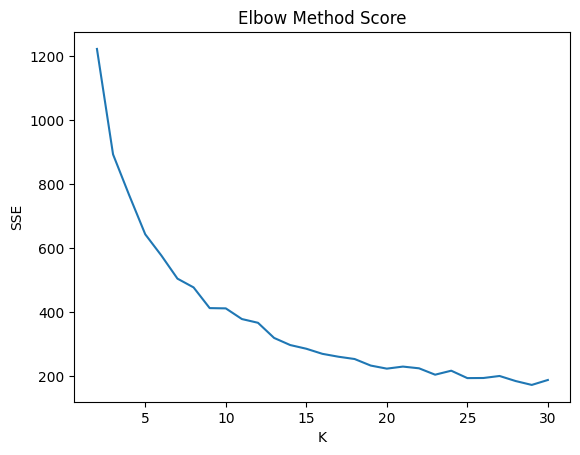

Elbow at K:9


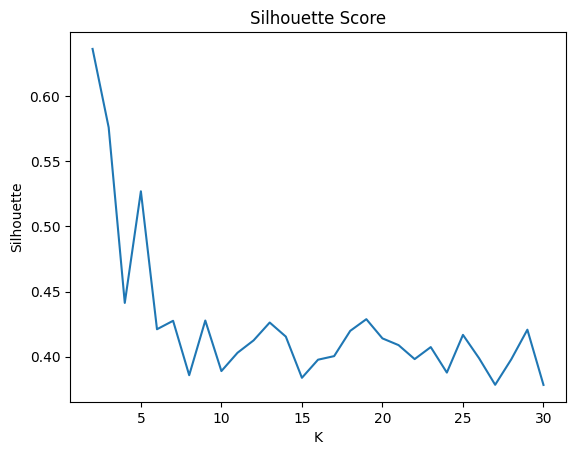

In [22]:
sse_scores = []
silhouette_scores = []

MAX_K = 31

#Trying different k recording sse and silhouette scores

for k in range(2,MAX_K):

    print('')
    kmeans = KMeans(featuresCol="num_attrs_clustering_scaled", k=k, initMode='random')
    model = kmeans.fit(kmeans_df)
    predictions = model.transform(kmeans_df)
    silhouette = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled").evaluate(predictions)
    sse = model.summary.trainingCost
    
    print(f"K: {k}")
    print(f"Silhouette (squared euclidean): {silhouette:.4f}")
    print(f"SSE: {sse:.4f}")
    sse_scores.append(sse)
    silhouette_scores.append(silhouette)


plt.figure()
plt.plot(range(2, MAX_K), sse_scores)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method Score")
plt.show()


kl = KneeLocator(range(2, MAX_K), sse_scores, curve="convex", direction="decreasing")
print(f"Elbow at K:{kl.elbow}")

plt.figure()
plt.plot(range(2, MAX_K), silhouette_scores)
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette Score")
plt.show()

Retraining K-means using the best k (=5) according to SSE-Silhouette trade-off 

In [35]:
kmeans=KMeans(featuresCol="num_attrs_clustering_scaled",k=5, initMode='random')
model = kmeans.fit(kmeans_df)
predictions = model.transform(kmeans_df)

silhouette = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled").evaluate(predictions)
sse = model.summary.trainingCost

print(f"Silhouette: {silhouette}")
print(f"SSE: {sse}")

Silhouette: 0.5269041589219801
SSE: 643.4198371538104


## Distribution analysis

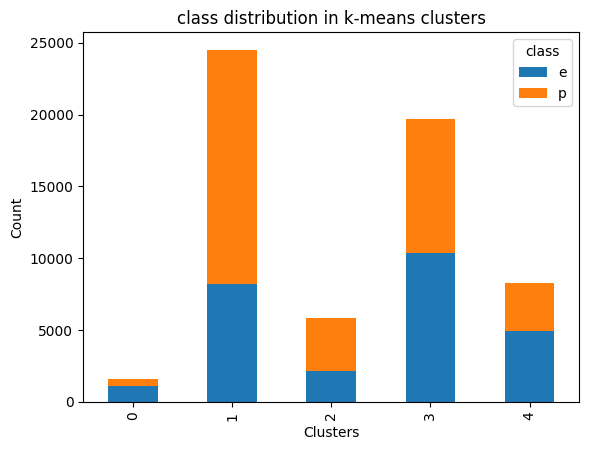

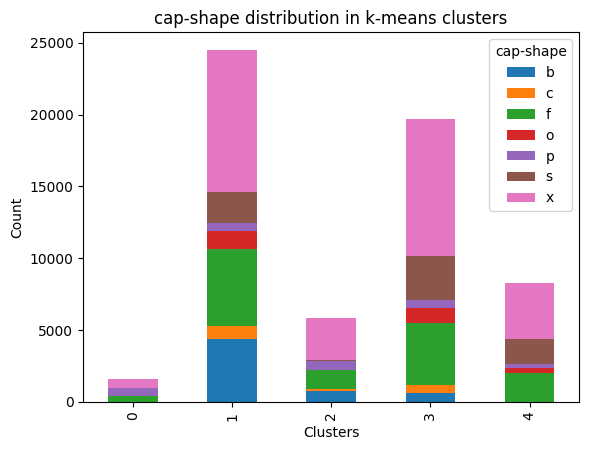

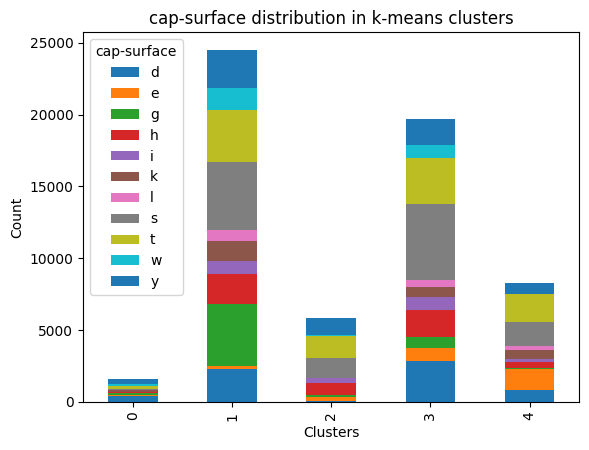

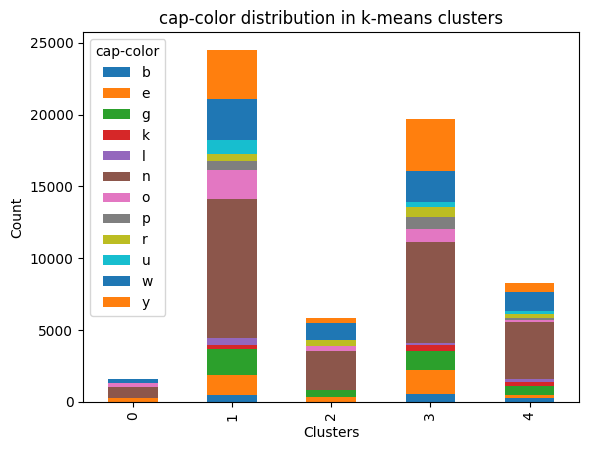

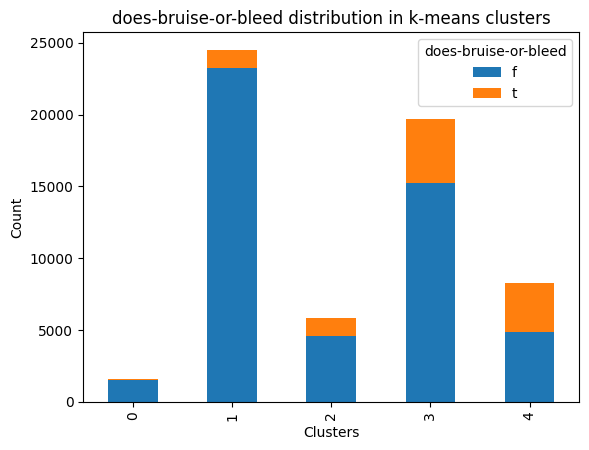

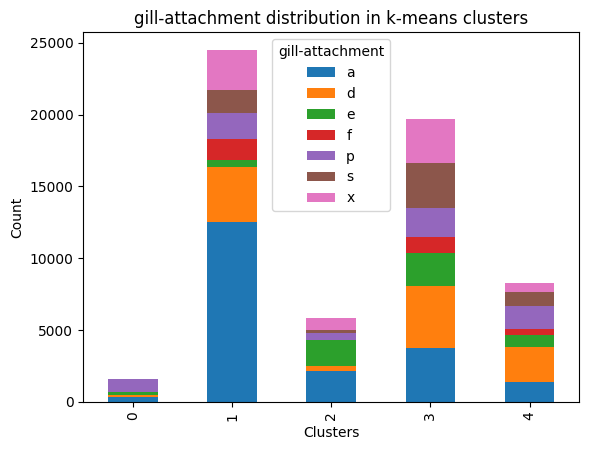

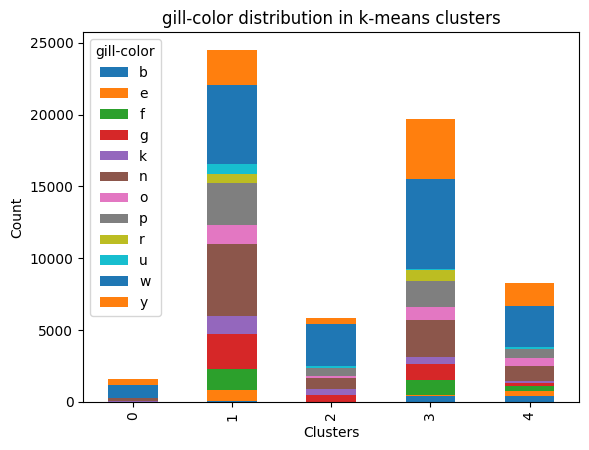

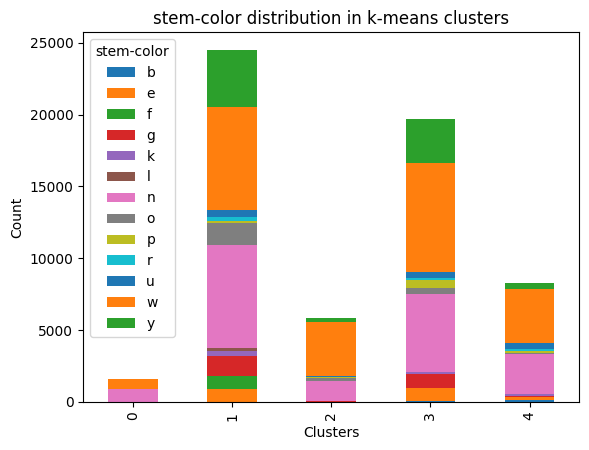

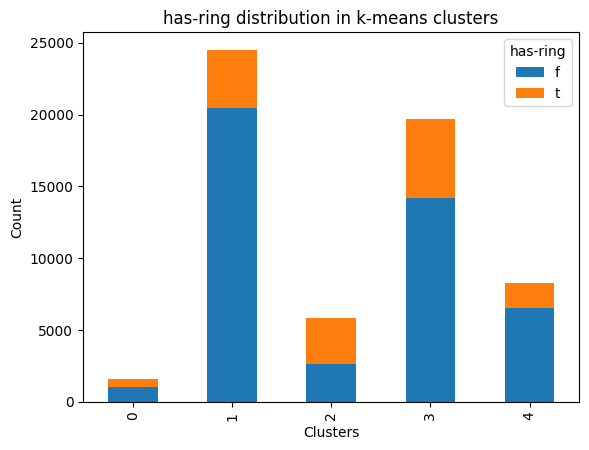

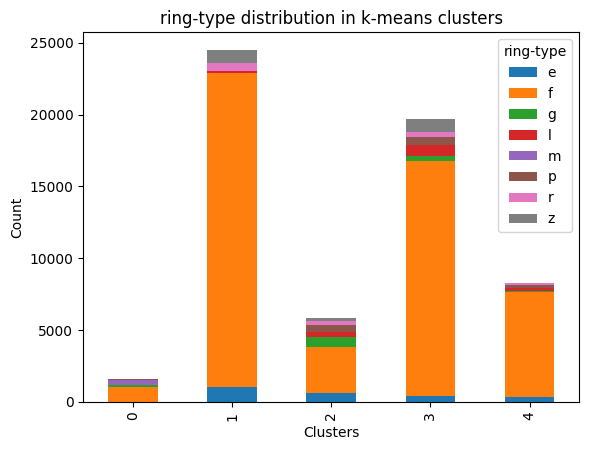

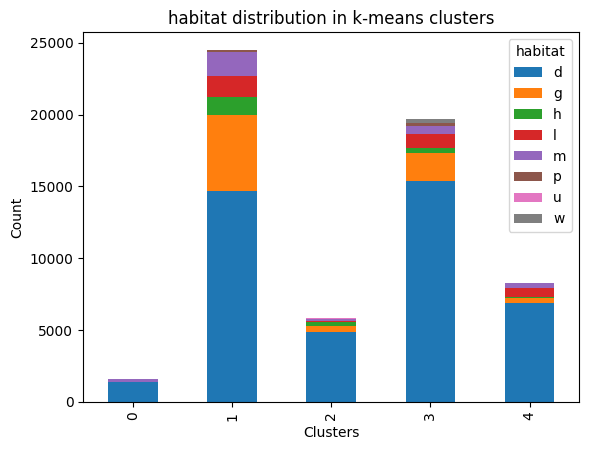

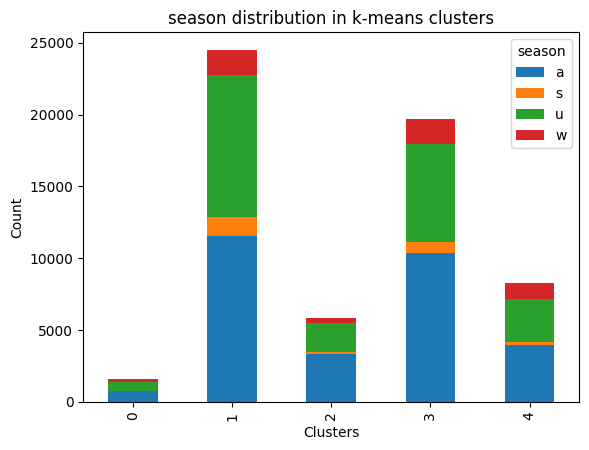

In [36]:
for c in cat_cols:
    counts = predictions.groupBy('prediction', c).count().toPandas()
    counts = counts.pivot(index='prediction', columns=c, values='count')
    counts.plot(kind='bar', stacked=True, title=f'{c} distribution in k-means clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Count')
    plt.show()

# Bisecting k-means

Searching best k using elbow method

K: 2
Silhouette (squared euclidean): 0.6356
SSE: 1223.7163



K: 3
Silhouette (squared euclidean): 0.3660
SSE: 1027.7552



K: 4
Silhouette (squared euclidean): 0.4462
SSE: 757.5832

K: 5
Silhouette (squared euclidean): 0.3270
SSE: 719.5846



K: 6
Silhouette (squared euclidean): 0.2864
SSE: 687.9706

K: 7
Silhouette (squared euclidean): 0.3111
SSE: 605.2769

K: 8
Silhouette (squared euclidean): 0.3260
SSE: 512.7626

K: 9
Silhouette (squared euclidean): 0.2951
SSE: 496.6285



K: 10
Silhouette (squared euclidean): 0.2609
SSE: 483.4847



K: 11
Silhouette (squared euclidean): 0.2759
SSE: 447.6365

K: 12
Silhouette (squared euclidean): 0.3078
SSE: 431.6680

K: 13
Silhouette (squared euclidean): 0.2978
SSE: 421.1848

K: 14
Silhouette (squared euclidean): 0.3066
SSE: 404.4632



K: 15
Silhouette (squared euclidean): 0.2942
SSE: 389.4202



K: 16
Silhouette (squared euclidean): 0.3061
SSE: 324.8900



K: 17
Silhouette (squared euclidean): 0.2621
SSE: 321.2496



K: 18
Silhouette (squared euclidean): 0.2568
SSE: 308.8380



K: 19
Silhouette (squared euclidean): 0.2701
SSE: 295.9123



K: 20
Silhouette (squared euclidean): 0.2465
SSE: 292.7743



K: 21
Silhouette (squared euclidean): 0.2457
SSE: 289.0752



K: 22
Silhouette (squared euclidean): 0.2334
SSE: 286.8723



K: 23
Silhouette (squared euclidean): 0.2566
SSE: 251.2444



K: 24
Silhouette (squared euclidean): 0.2635
SSE: 248.1722



K: 25
Silhouette (squared euclidean): 0.2945
SSE: 239.7819



K: 26
Silhouette (squared euclidean): 0.2879
SSE: 233.4270



K: 27
Silhouette (squared euclidean): 0.2938
SSE: 228.1001



K: 28
Silhouette (squared euclidean): 0.3017
SSE: 215.9501



K: 29
Silhouette (squared euclidean): 0.2987
SSE: 211.7214



K: 30
Silhouette (squared euclidean): 0.3003
SSE: 201.3393


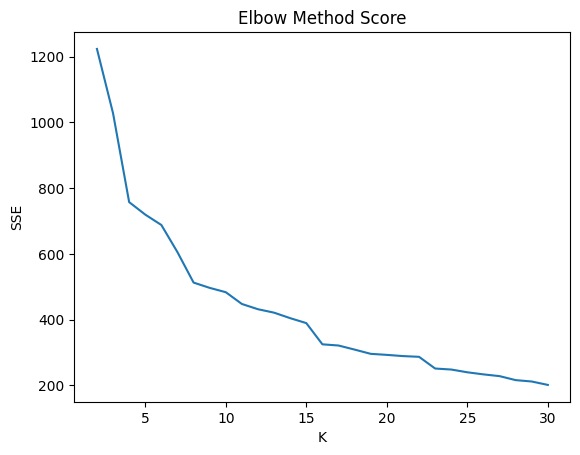

Elbow at K:8


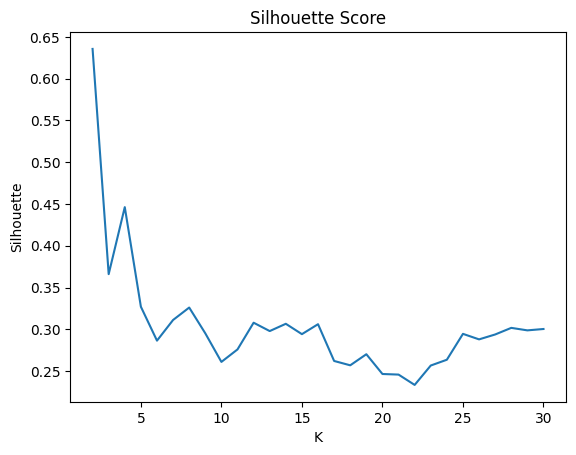

In [25]:
sse_scores = []
silhouette_scores = []

MAX_K = 31

#Trying different k recording sse and silhouette scores

for k in range(2,MAX_K):

    print('')
    bis_kmeans = BisectingKMeans(featuresCol="num_attrs_clustering_scaled", k=k)
    model = bis_kmeans.fit(bisecting_kmeans_df)
    predictions = model.transform(bisecting_kmeans_df)
    silhouette = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled").evaluate(predictions)
    sse = model.summary.trainingCost
    
    print(f"K: {k}")
    print(f"Silhouette (squared euclidean): {silhouette:.4f}")
    print(f"SSE: {sse:.4f}")
    sse_scores.append(sse)
    silhouette_scores.append(silhouette)


plt.figure()
plt.plot(range(2, MAX_K), sse_scores)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method Score")
plt.show()


kl = KneeLocator(range(2, MAX_K), sse_scores, curve="convex", direction="decreasing")
print(f"Elbow at K:{kl.elbow}")

plt.figure()
plt.plot(range(2, MAX_K), silhouette_scores)
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette Score")
plt.show()

Retraining Bisecting K-means using optimal k

In [26]:
bis_kmeans=BisectingKMeans(featuresCol="num_attrs_clustering_scaled",k=8)

bis_model = bis_kmeans.fit(bisecting_kmeans_df)
bis_predictions_retrained = bis_model.transform(bisecting_kmeans_df)

eval = ClusteringEvaluator(featuresCol="num_attrs_clustering_scaled")
bis_silhouette = eval.evaluate(bis_predictions_retrained)

print(f"Silhouette: {bis_silhouette}")
print(f"SSE: {bis_model.summary.trainingCost}")

Silhouette: 0.3259909021924991
SSE: 512.7626160722973


## Distribution analysis

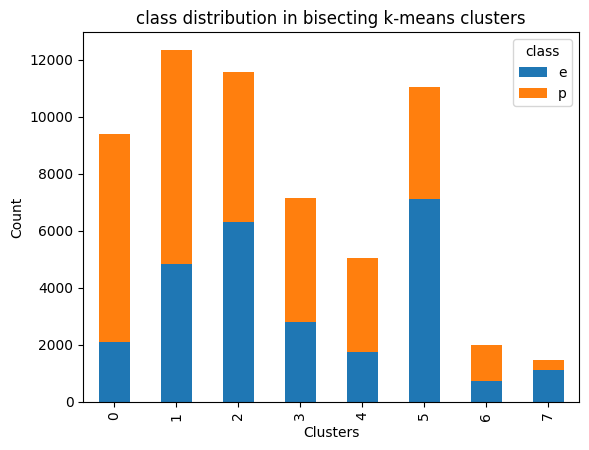

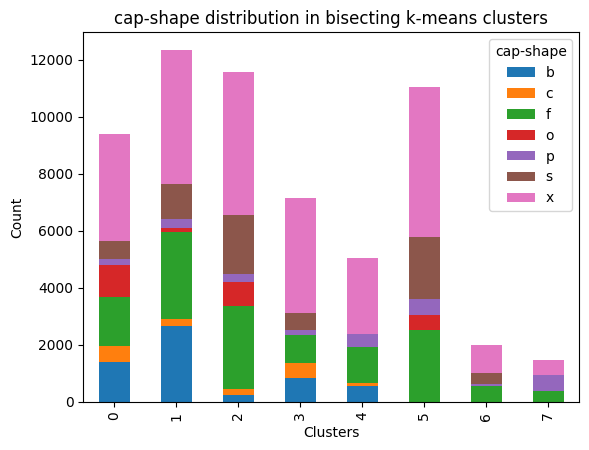

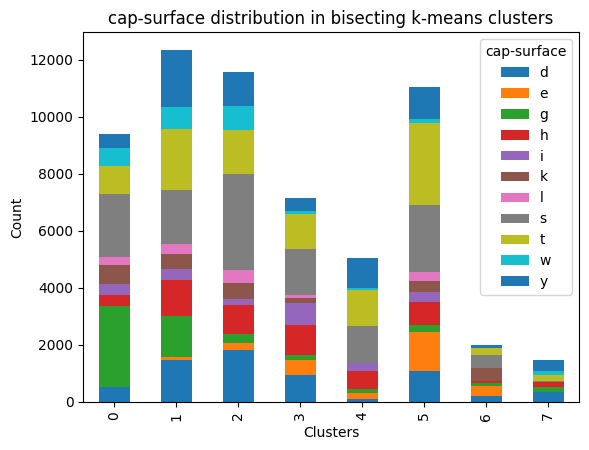

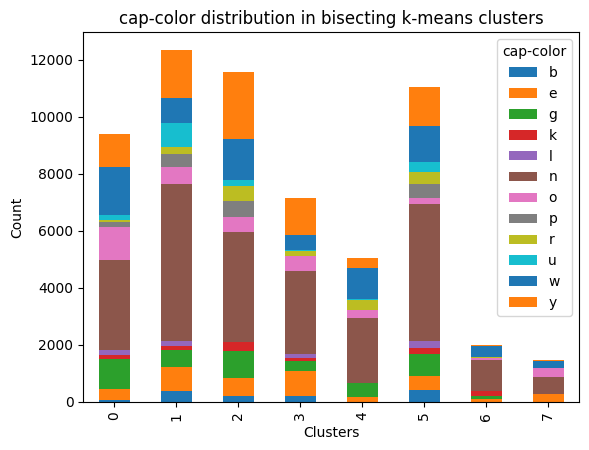

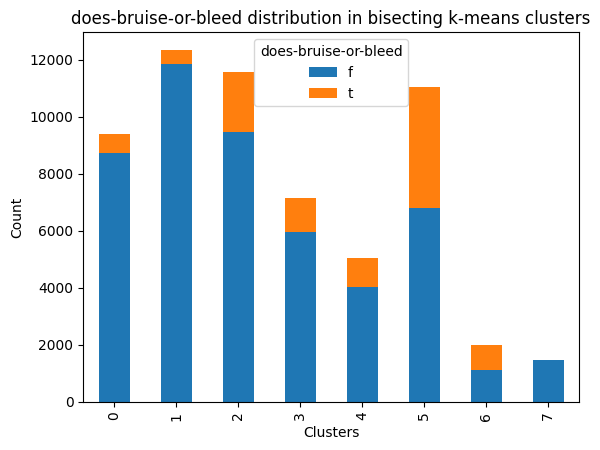

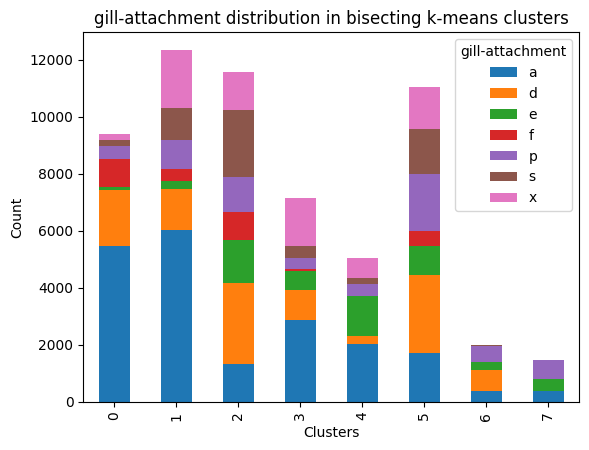

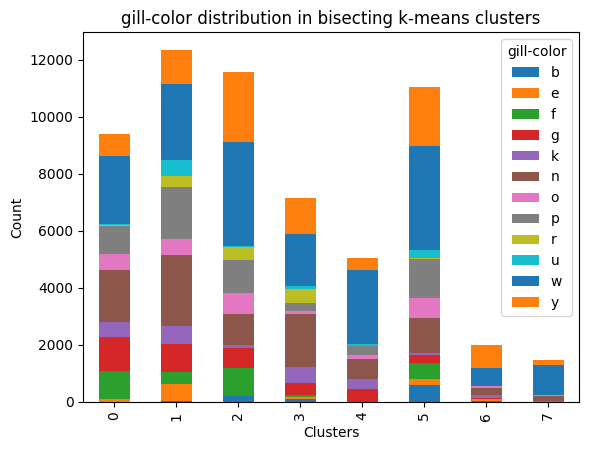

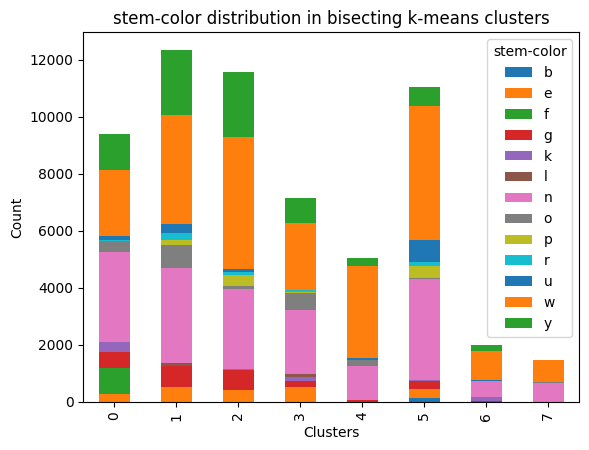

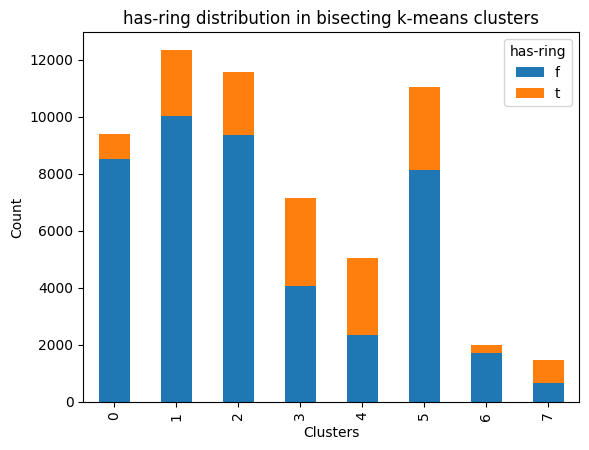

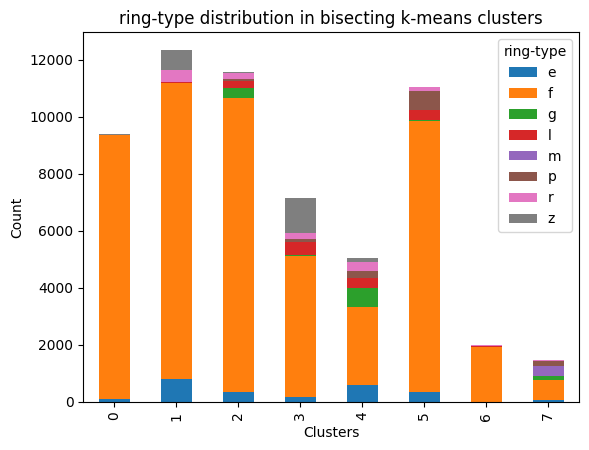

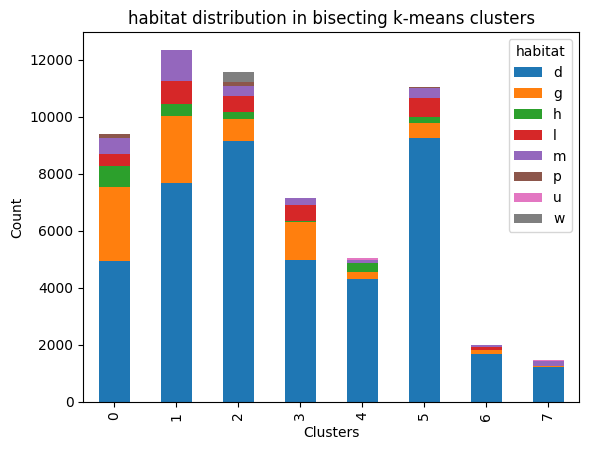

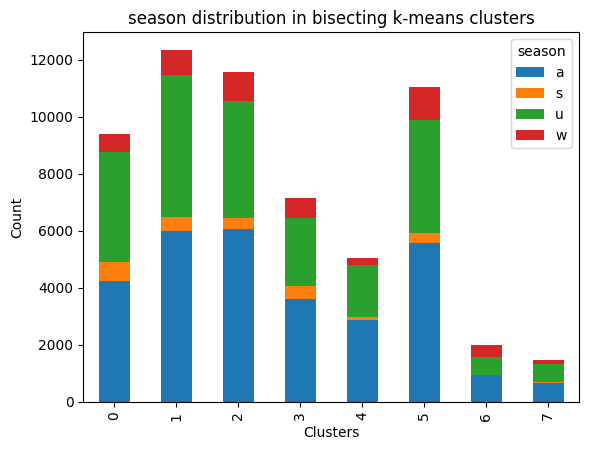

In [27]:
for c in cat_cols:
    counts = bis_predictions_retrained.groupBy('prediction', c).count().toPandas()
    counts = counts.pivot(index='prediction', columns=c, values='count')
    counts.plot(kind='bar', stacked=True, title=f'{c} distribution in bisecting k-means clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Count')
    plt.show()